In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def derivative_s(s, i):
    return -infection_parameter * s * i / N

def derivative_i(s, i):
    return i * (infection_parameter * s / N - recovery_parameter)

def derivative_r(i):
    return recovery_parameter * i


In [ ]:
N = 100000    # Количество людей
i = 1         # Начальное количество зараженных людей
r = 0         # Начальное количество умерших или вздоровивших людей
s = N - i - r # Начальное количество здоровых людей
t = 0         # Начальное время
h = 1         # Шаг

# Параметры модели
infection_parameter = 0.5
recovery_parameter = 0.1

S = []
I = []
R = []
T = []

In [ ]:
while t <= 100:
    S.append(s)
    I.append(i)
    R.append(r)
    T.append(t)
    
    s_old = s
    i_old = i
    
    k1_s = derivative_s(s_old, i_old)
    k1_i = derivative_i(s_old, i_old)
    k1_r = derivative_r(i_old)
    
    k2_s = derivative_s(s_old + h * k1_s / 2, i_old + h * k1_i / 2)
    k2_i = derivative_i(s_old + h * k1_s / 2, i_old + h * k1_i / 2)
    k2_r = derivative_r(i_old + h * k1_i / 2)
    
    k3_s = derivative_s(s_old + h * k2_s / 2, i_old + h * k2_i / 2)
    k3_i = derivative_i(s_old + h * k2_s / 2, i_old + h * k2_i / 2)
    k3_r = derivative_r(i_old + h * k2_i / 2)
    
    k4_s = derivative_s(s_old + h * k3_s, i_old + h * k3_i)
    k4_i = derivative_i(s_old + h * k3_s, i_old + h * k3_i)
    k4_r = derivative_r(i_old + h * k3_i)
    
    s += h * (k1_s + 2 * k2_s + 2 * k3_s + k4_s) / 6
    i += h * (k1_i + 2 * k2_i + 2 * k3_i + k4_i) / 6
    r += h * (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6
    t += h

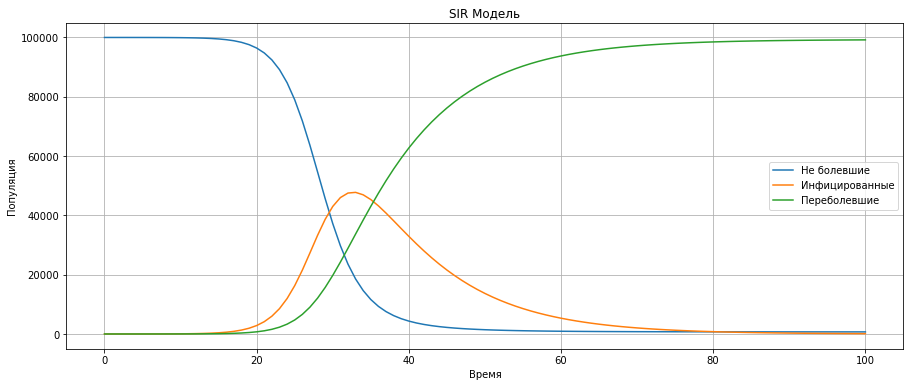

In [ ]:
plt.figure(figsize=[15, 6])
plt.plot(T, S, label="Не болевшие")
plt.plot(T, I, label="Инфицированные")
plt.plot(T, R, label="Переболевшие")
plt.grid()
plt.legend()
plt.title("SIR Модель")
plt.xlabel("Время")
plt.ylabel("Популяция")
plt.show()